# Tasks 

In [1]:

# 1. Chunking using RegEx Parser
# 2. spaCy 
# 3. Sentiment Ananlysis using Logistic Regression

# Sentiment Ananlysis

In [2]:
# Vectorization needs to be done as we are dealing with text data here. 

In [3]:
#loading the dataset
import pandas as pd
df = pd.read_csv('IMDB Dataset.csv')

In [4]:
#After loading the dataset, let us introspect this dataset
df.head(10) # Firat 10 Reviews and Sentiments

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
df['review'][0] #Displaying the first review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [6]:
#Stemming to get rid of suffixes

In [7]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [8]:
def stemmer_tokenize(text):
    return [porter.stem(word) for word in text.split()]

In [9]:
stemmer_tokenize('coders like coding and thus they code')

['coder', 'like', 'code', 'and', 'thu', 'they', 'code']

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\disha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# TF-IDF Vectorizer

# tf-idf(t,d) = tf(t,d) X idf(t,D)

# idf(t,d) = log

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer( strip_accents = None,
                         lowercase = False,
                         tokenizer = stemmer_tokenize,
                         use_idf = True,
                         norm = 'l2',
                         smooth_idf = True)
#output 
Y = df.sentiment.values
X = tfidf.fit_transform(df.review)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1, test_size = 0.5)

In [14]:
import pickle #saves the trained model so that it can be reused again without having to train from scratch
from sklearn.linear_model import LogisticRegressionCV

clf= LogisticRegressionCV(cv=5,
                    scoring = 'accuracy',
                    random_state = 0, 
                    n_jobs = 1,
                    verbose = 2,
                    max_iter = 300).fit(X_train, Y_train)
#saving the mode
saved_model = open('saved_model.sav', 'wb')

#using pickle library's dump function
pickle.dump(clf, saved_model)
saved_model.close()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.2min finished


In [16]:
#got the saved_model.sav saved in the directory

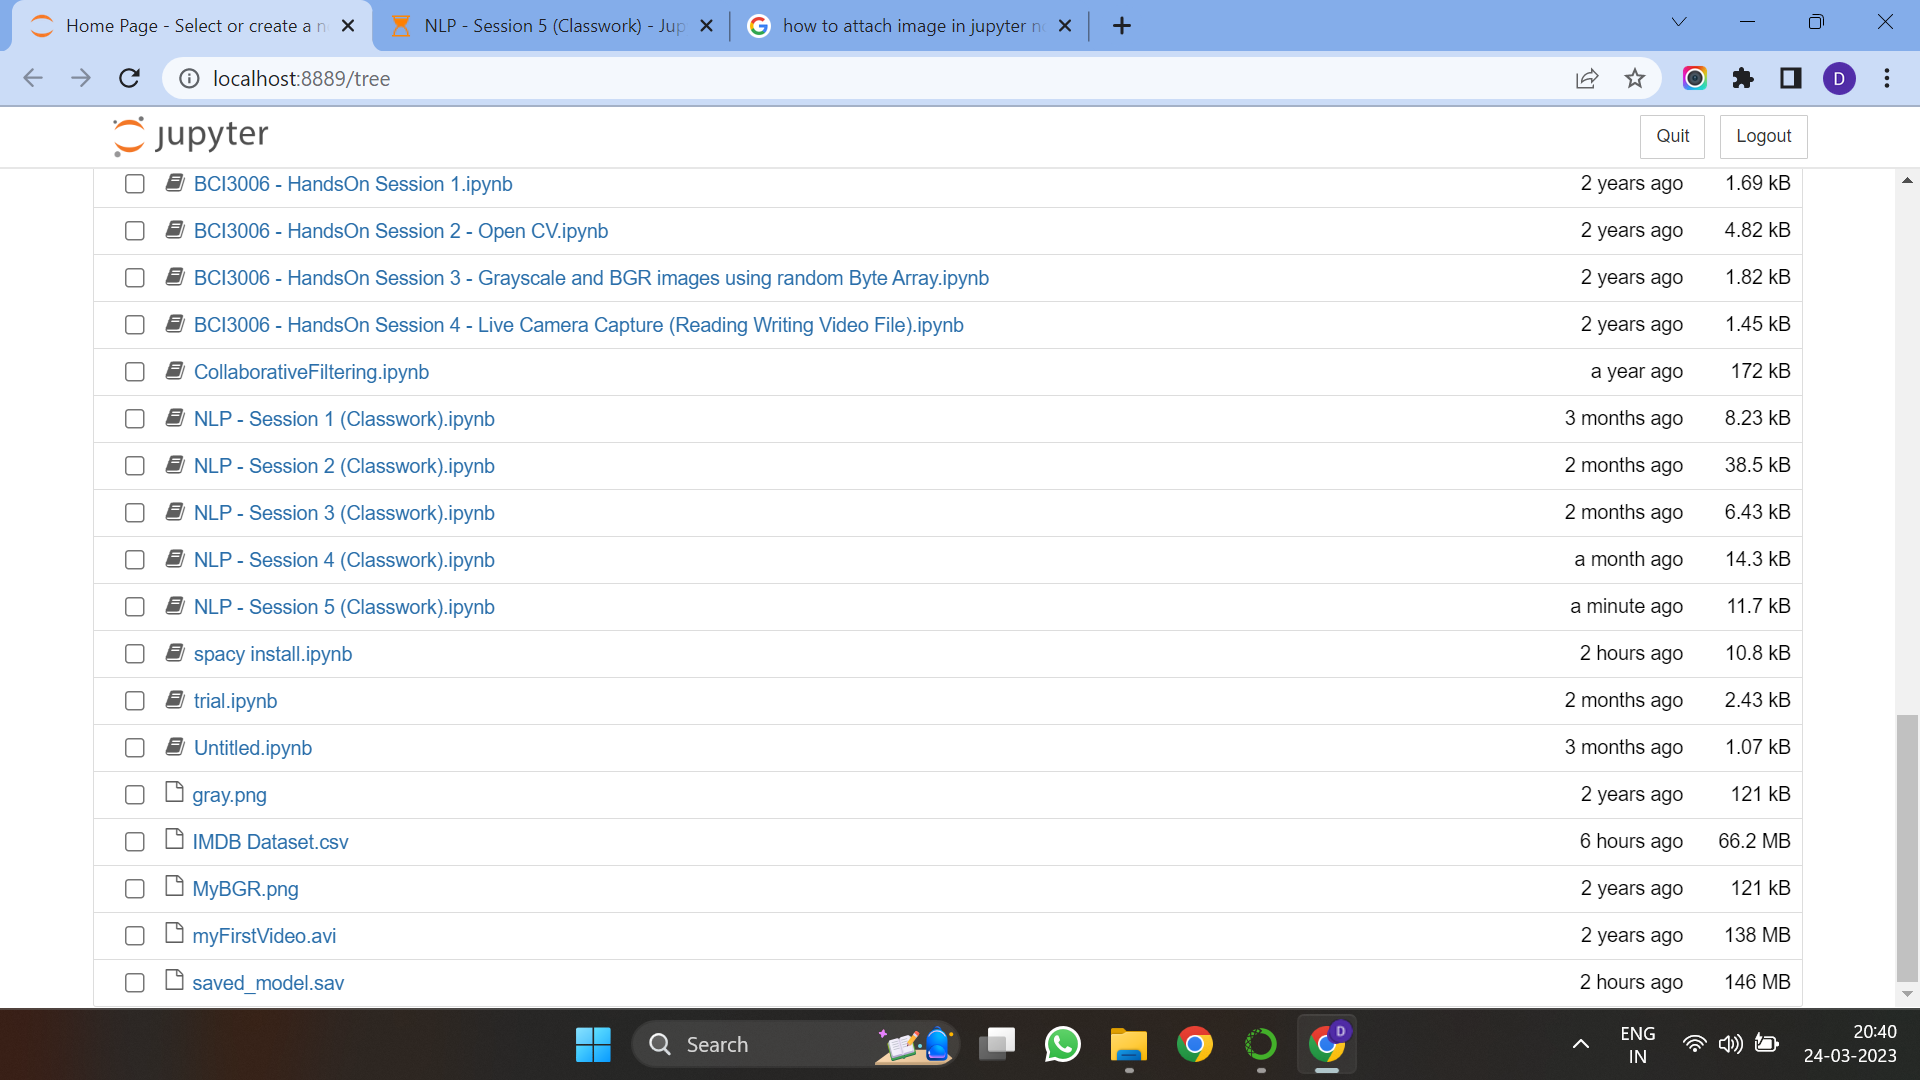